# Отчет
## Евсеев Евгений Васильевич — БПИ212

# Алгоритмы и их заявленная сложность
- Дейкстра — O((V + E) logV)
- Беллман-Форд — O(V^3)
- Флойд-Уоршалл — O(V^3)
- A* — O(b^d), где b — среднее ветвление графа, d — глубина пути

# Выводы по результатам тестов
# Сравнение алгоритмов на разных типах графов
Дейкстра и A* оказались самыми быстрыми алгоритмами на всех типах графов благодаря эффективному использованию информации о предполагаемом кратчайшем пути и возможности остановки при первом достижении заданной конечной вершины.

Алгоритмы Беллмана-Форда и Флойда-Уоршалла показали более низкую производительность. За исключением Sparse графа, Флойд-Уоршалл оказался быстрее Беллман-Форда. Это связано с особенностями данных алгоритмов и их подходом к обработке графов.

Перепады линий на графиках (особенно в Sparse) объясняются случайной генерацией графов и, как следствие, вариациями в балансе каждой вершины дерева (в Sparse) и расположением конечной вершины (во всех графах).

# Работа алгоритмов на разных типах графов
Я забыл включить легенды, а перегенерировать графики я не могу. Так что, легенда тут:

- Оранжевый — Sparse
- Синий — Connected
- Зеленый — Condensed

## Дейкстра
Время выполнения алгоритма Дейкстры имеет линейную зависимость от количества ребер. Однако следует помнить, что количество ребер напрямую зависит от количества вершин. Таким образом, можно сделать вывод, что скорость работы данного алгоритма практически не зависит от числа ребер.

Дейкстра работает очень (очень) быстро на Sparse графе, практически за константу, а на Connected и Condensed приближается к логарифму.

## Беллман-Форд
Как и в случае с Дейкстрой, алгоритм работает крайне быстро на Sparse графе, и количество ребер также не сильно влияет на асимптотику.

Для Connected и Condensed графов алгоритм Беллмана-Форда приближается к O(V^3).

## Флойд-Уоршалл

Работает так же, как и Беллман-Форд (я даже специально проверил, чтобы убедиться, что я ничего не перепутал). Так что выводы остаются теми же.

## A*

Очень сильно напоминает Дейкстру, но видно, что константа чуть больше. Также присутствуют более выраженные перепады.


# Выводы

При выборе алгоритма для решения задачи поиска кратчайшего пути необходимо учитывать характеристики графа и саму поставленную задачу. В большинстве случаев алгоритмы Дейкстры и A* будут предпочтительнее, когда требуется найти путь до заданной вершины. Однако для определенных сценариев придется воспользоваться алгоритмом Беллмана-Форда или Флойд-Уоршалла.



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [336]:
ALGOS = ['dijkstras', 'bellmanford', 'floydwarshall', 'astar']

connected = pd.read_csv('../tests_results/Connected_graph.csv', sep=';').set_index('algo').T
sparse = pd.read_csv('../tests_results/Sparse_graph.csv', sep=';').set_index('algo').T
dense = pd.read_csv('../tests_results/Dense_graph.csv', sep=';').set_index('algo').T

data = {
    'connected': connected,
    'sparse': sparse,
    'dense': dense
}

for df in data.values():
    df.columns = df.columns.map(lambda x: x.lower())
    df['vertexes'] = df.index.map(lambda x: int(x.split('@')[0]))
    df['edges'] = df.index.map(lambda x: int(x.split('@')[1]))
    df.set_index(['vertexes', 'edges'], inplace=True)
    df.columns.name = None

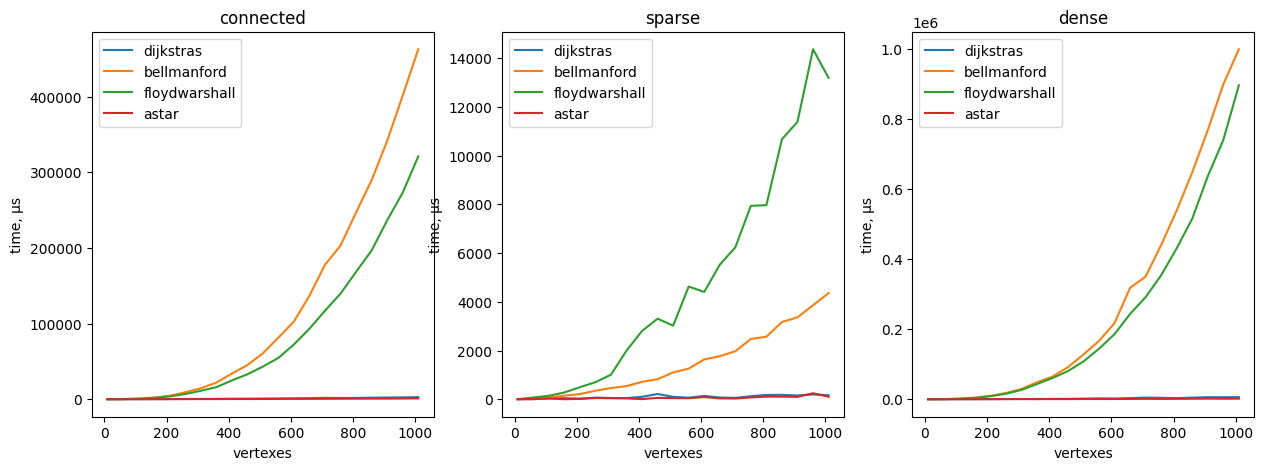

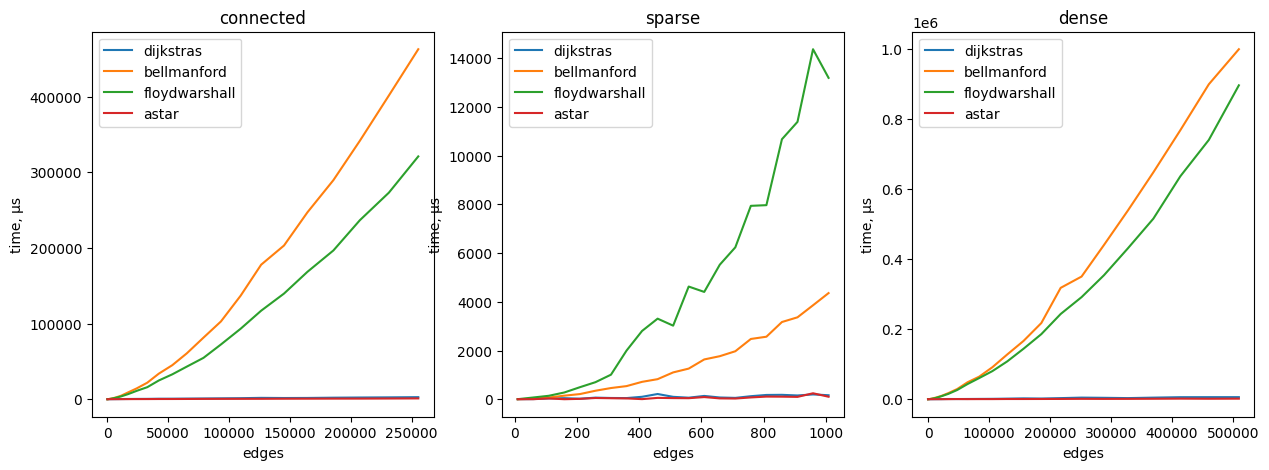

In [337]:
# plot by vertexes
for ind, (name, df) in enumerate(data.items()):
    df_by_vertexes = df.copy()
    df_by_vertexes.index = df_by_vertexes.index.map(lambda x: x[0])
    df_by_vertexes.index.name = 'vertexes'

    pl = df_by_vertexes.plot(title=name, ax=plt.subplot(1, len(data), ind + 1), figsize=(15, 5))
    pl.set_xlabel('vertexes')
    pl.set_ylabel('time, μs')

plt.show()

# plot by edges
for ind, (name, df) in enumerate(data.items()):
    df_by_edges = df.copy()
    df_by_edges.index = df_by_edges.index.map(lambda x: x[1])
    df_by_edges.index.name = 'edges'

    pl = df_by_edges.plot(title=name, ax=plt.subplot(1, len(data), ind + 1), figsize=(15, 5))
    pl.set_xlabel('edges')
    pl.set_ylabel('time, μs')

plt.show()





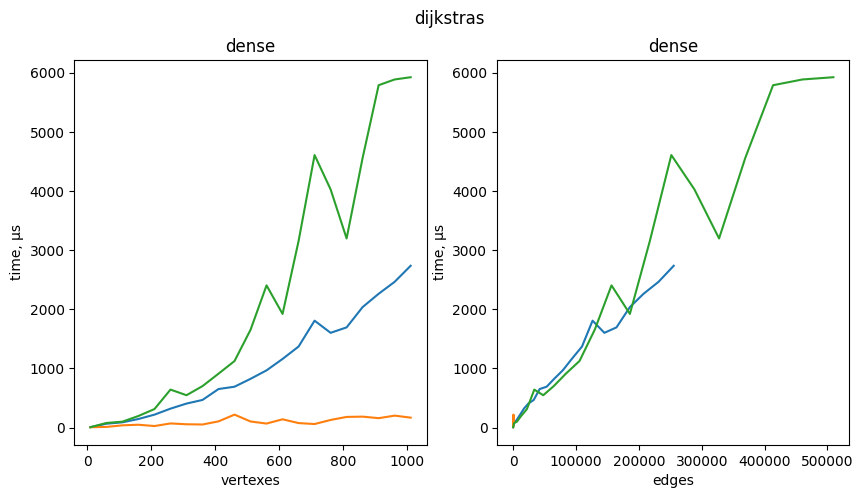

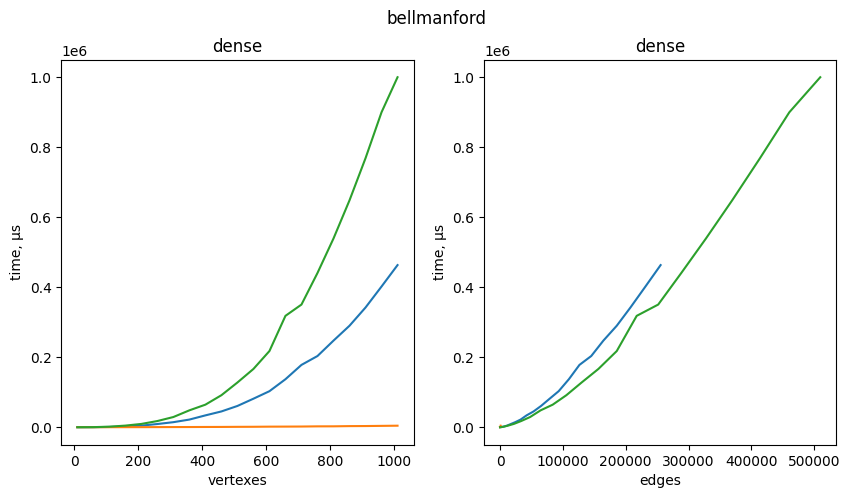

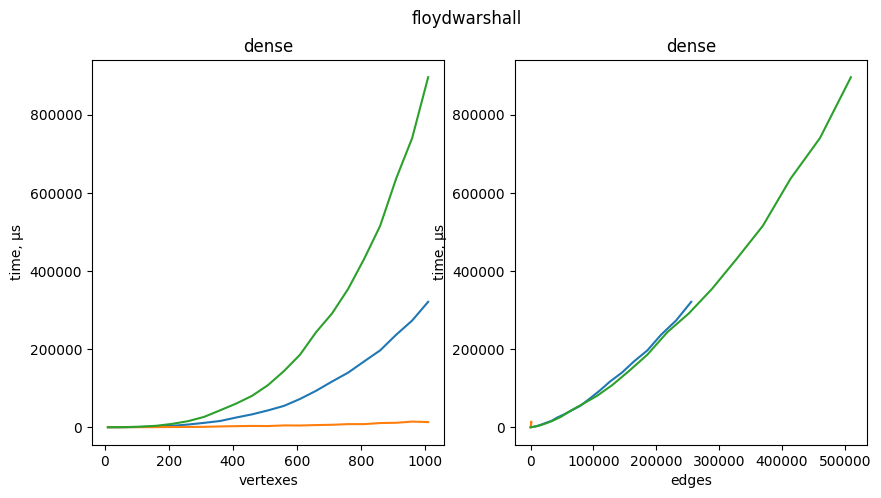

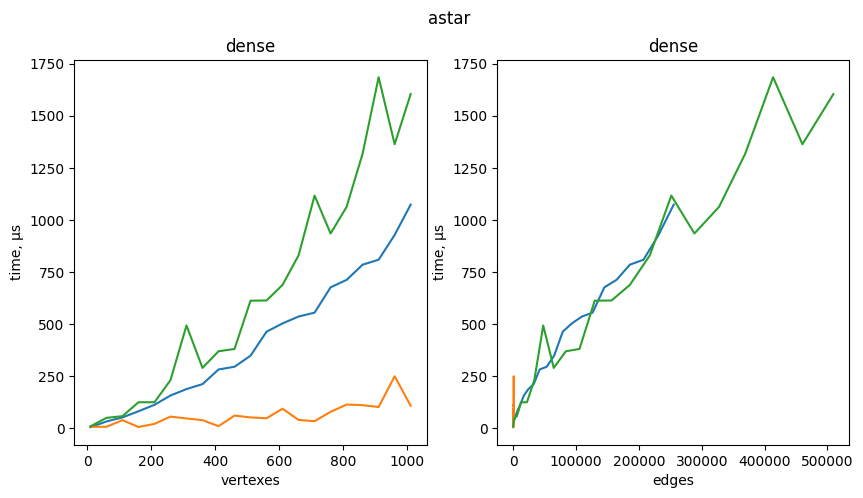

In [338]:
for algo in ALGOS:
    # subplot
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(algo)

    algo_df = pd.DataFrame(columns=['vertexes', 'edges'])
    algo_df.set_index(['vertexes', 'edges'], inplace=True)
    for name, df in data.items():
        algo_df = pd.merge(algo_df, df[algo], left_index=True, right_index=True, how='outer')
    algo_df.columns = [*data.keys()]

    # plot by vertexes
    df_by_vertexes = algo_df.copy()
    df_by_vertexes.index = df_by_vertexes.index.map(lambda x: x[0])
    df_by_vertexes.index.name = 'vertexes'
    df_by_vertexes = df_by_vertexes.groupby('vertexes').mean()
    for col in df_by_vertexes.columns:
        mask = df_by_vertexes[col].isna()
        # plot to subplot
        pl = df_by_vertexes[~mask][col].plot(title=col, ax=axs[0])
        pl.set_xlabel('vertexes')
        pl.set_ylabel('time, μs')

    # plot by edges
    df_by_edges = algo_df.copy()
    df_by_edges.index = df_by_edges.index.map(lambda x: x[1])
    df_by_edges.index.name = 'edges'
    df_by_edges = df_by_edges.groupby('edges').mean()
    for ind, col in enumerate(df_by_edges.columns):
        mask = df_by_edges[col].isna()
        # plot to subplot
        pl = df_by_edges[~mask][col].plot(title=col, ax=axs[1])
        pl.set_xlabel('edges')
        pl.set_ylabel('time, μs')

    plt.show()

